<a href="https://colab.research.google.com/github/RDLL/curso_mineria_de_datos/blob/main/Tarea2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# I. Preprocesamiento de Datos
## Tarea 2 
## Datos anómalos/atípicos/outliers

Importamos la libreria pandas

In [90]:
import pandas as pd 
import numpy as np

Cargamos el dataset y mostramos algunos datos

In [109]:
df = pd.read_csv('https://datahub.io/machine-learning/hepatitis/r/hepatitis.csv')
df.head(n=10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.9,95.0,28.0,4.0,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,NaN,NaN,NaN,NaN,NaN,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,NaN,NaN,NaN,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.7,NaN,48.0,4.4,NaN,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,120.0,3.9,NaN,False,live


Reemplazamos los datos faltantes

In [110]:
df = df.interpolate()
df.head(n=10)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.00,85.0,18.000000,4.000000,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.90,135.0,42.000000,3.500000,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.70,96.0,32.000000,4.000000,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.70,46.0,52.000000,4.000000,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.00,70.5,200.000000,4.000000,77.5,False,live
5,34,female,True,False,False,False,False,True,False,False,False,False,False,0.90,95.0,28.000000,4.000000,75.0,False,live
6,51,female,False,False,True,False,True,True,False,True,True,False,False,0.95,91.6,34.666667,4.133333,77.0,False,die
7,23,female,True,False,False,False,False,True,False,False,False,False,False,1.00,88.2,41.333333,4.266667,79.0,False,live
8,39,female,True,False,True,False,False,True,True,False,False,False,False,0.70,84.8,48.000000,4.400000,81.0,False,live
9,30,female,True,False,False,False,False,True,False,False,False,False,False,1.00,81.4,120.000000,3.900000,83.0,False,live


Realizamos un histograma de la columna albumin

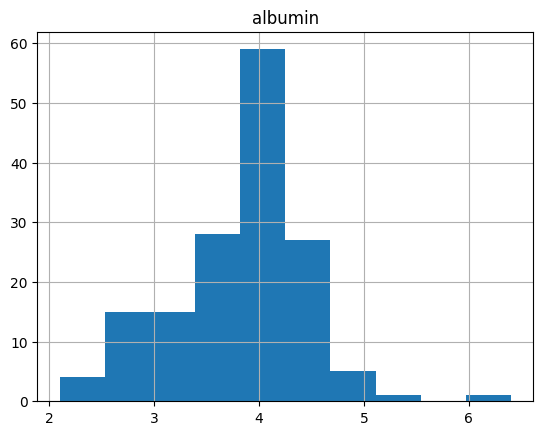

In [79]:
histo = df.hist(column='albumin')

Calculamos el cuartil 1 y 3 así como el IQR (rango intercuartil)

In [111]:
quartiles = df['albumin'].quantile(q=[0.25, 0.75])
quartiles

0.25    3.425
0.75    4.200
Name: albumin, dtype: float64

In [112]:
iqr = quartiles[0.75] - quartiles[0.25]
iqr

0.7750000000000004

Hacemos el diagrama de caja

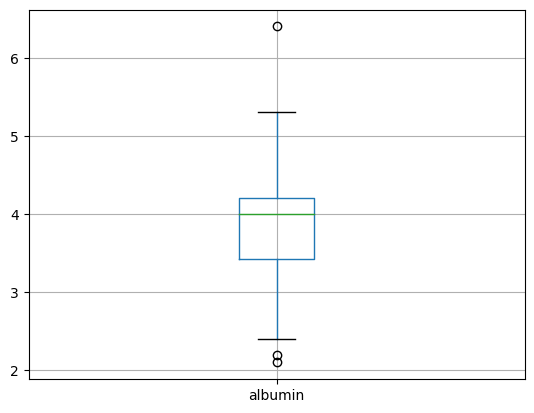

In [83]:
boxplot = df.boxplot(column=['albumin'])

Obtenemos los valores de los bigotes superior e inferior así como la ubicacion de los outliers

In [113]:
sup = quartiles[0.75] + 1.5*iqr
inf = quartiles[0.25] - 1.5*iqr
upper = df['albumin'] > sup
lower = df['albumin'] < inf
print('Bigote Superior: ',sup,'\nBigote Inferior: ', inf)
outliers_upper = np.where(upper)
outliers_lower = np.where(lower)
print('outliers superior:', outliers_upper,'\noutliers_inferior: ', outliers_lower)

Bigote Superior:  5.362500000000001 
Bigote Inferior:  2.2624999999999993
outliers superior: (array([105]),) 
outliers_inferior:  (array([104, 131]),)


Eliminamos los outliers

In [119]:
df.drop(df.loc[(upper) | (lower)].index, inplace = True) 

Realizamos nuevamente el histograma y el diagrama de caja

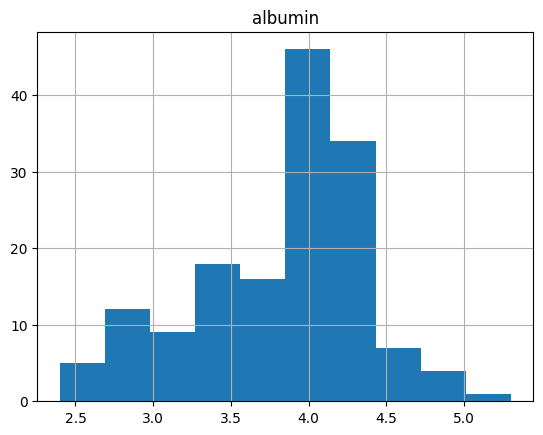

In [120]:
histo = df.hist(column='albumin')

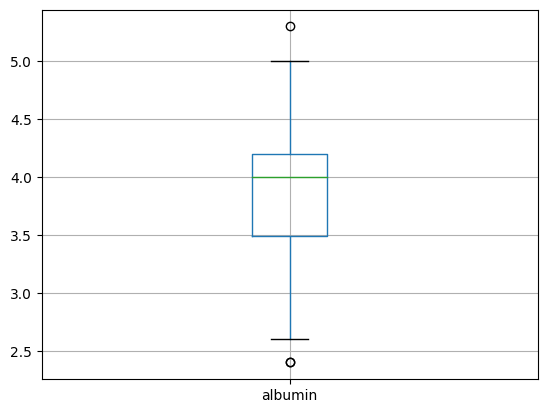

In [121]:
boxplot = df.boxplot(column=['albumin'])